# CART树Classification And Regression Tree

In [1]:
from sklearn import metrics,tree,datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz

### 分类树

In [2]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
# 切分数据
X= iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# 定义，训练模型
clf = tree.DecisionTreeClassifier(criterion='gini')
clf.fit(X_train,y_train)
# 预测
y_pre = clf.predict(X_test)
y_pre

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 2, 2, 1, 2])

In [4]:
# 预测结果评估
print("模型效果评估：")
print(metrics.classification_report(y_test,y_pre))

模型效果评估：
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



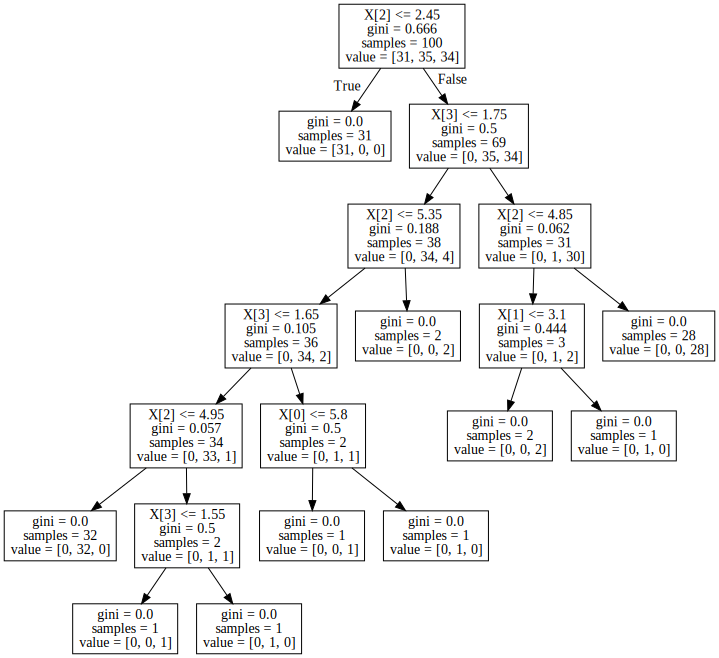

In [5]:
# 决策树图形
dot_data = export_graphviz(clf,)
graph = graphviz.Source(dot_data)
graph.render("iris",directory='./tree_pdf')
graph

### 回归树--boston房价

In [6]:
boston = datasets.load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
X = boston.data
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# 定义，训练模型
dtr = tree.DecisionTreeRegressor()
dtr.fit(X_train,y_train)
# 预测
y_pre = dtr.predict(X_test)
y_pre

array([22. , 28.6,  8.1, 24.7, 15.2, 21.6, 19.5, 17.8, 21.6, 18.9, 20.5,
       19.5,  6.3, 21.1, 17.1, 22.8, 20.5, 10.5, 43.1, 14.6, 24.1, 24.4,
       13.5, 20.6, 16.7, 14.6, 22.6, 11.7, 20.5, 22.7, 19.8, 22.9, 36.5,
       15.3, 14.4, 13.8, 31.2, 19. , 21.4, 24.7, 19.4, 36.1, 35.2, 26.4,
       22. ,  8.5, 13.5, 24.7, 21.7, 32.5, 19.1, 34.9, 13.5, 30.1, 43.1,
       20.6, 17.8, 34.9, 22.9, 23.1, 28.7, 24.8, 30.1, 18.2, 24.5, 14.4,
        9.5, 22.9, 32.5, 14.4, 22.6, 22.8,  8.4, 18.6, 20.6,  6.3, 19.3,
       35.2, 10.2, 14.4, 22. , 13.1, 17.5, 10.5, 20.3, 25.1, 14.1, 23. ,
       23. , 18.4, 22.2,  7.2, 19.8, 17.5, 22.9, 18.4, 50. , 16.3, 11.7,
       16.3, 17.5, 21.1, 14.6, 20.4, 24.7, 13.5, 20.4, 24.7, 19. , 21.9,
        8.4, 16.3, 22.2, 21.4, 28.7, 16.7, 50. , 14.8, 17.1, 23.7, 16.1,
       25. ,  8.3, 18.5, 24.7, 22.9, 23.2, 37.2, 18.3, 50. , 15.2, 23.7,
       18.2, 23.2, 14.6, 20.2, 19.8, 24.8, 30.1, 14.8, 21.4, 23.5, 19. ,
       14.4,  6.3, 20.1, 13.8, 14.6, 15.6, 44.8, 14

In [9]:
print("回归树绝对值偏差均值",metrics.mean_absolute_error(y_test,y_pre))
print("回归树方差",metrics.mean_squared_error(y_test,y_pre))

回归树绝对值偏差均值 2.972455089820359
回归树方差 19.193652694610776


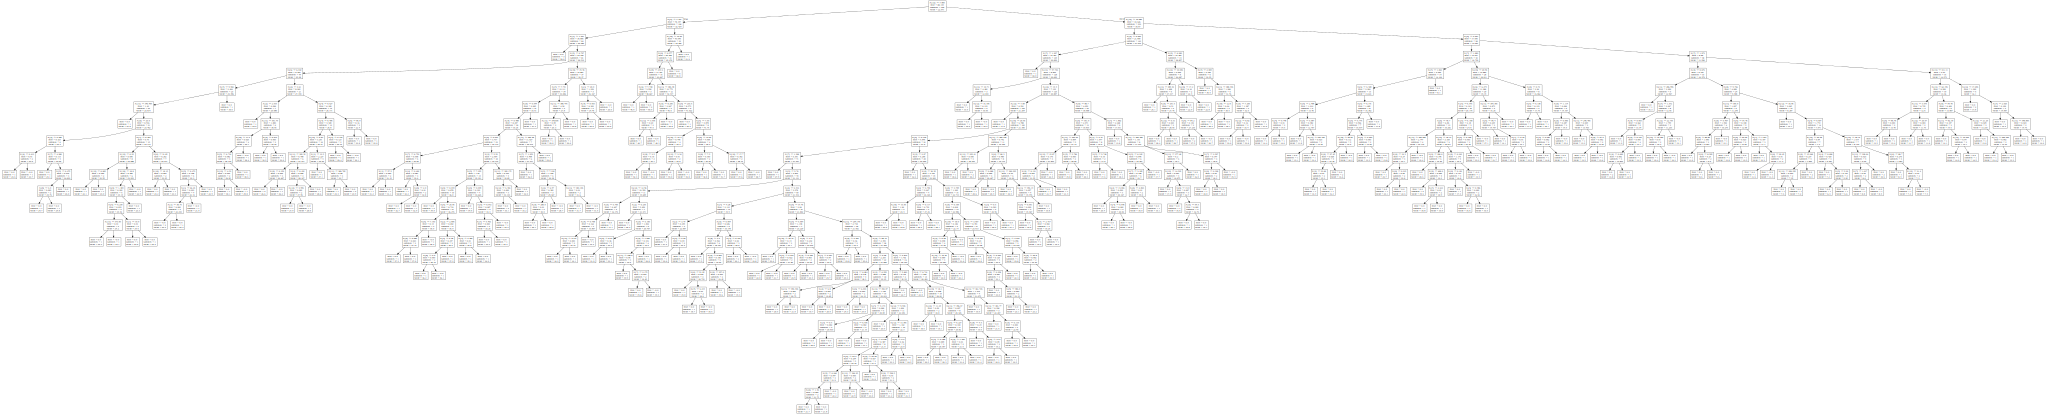

In [10]:
# 决策树图形
dot_data = export_graphviz(dtr)
graph = graphviz.Source(dot_data)
graph.render("boston",directory='./tree_pdf')
graph

### 作业手写数据集

In [11]:
digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [12]:
X = digits.data
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# 定义，训练模型
dtr = tree.DecisionTreeRegressor()
dtr.fit(X_train,y_train)
# 预测
y_pre = dtr.predict(X_test)
y_pre

array([6., 9., 3., 7., 2., 1., 5., 2., 5., 2., 1., 3., 3., 0., 4., 2., 3.,
       7., 8., 6., 4., 3., 7., 7., 5., 6., 3., 5., 6., 3., 4., 9., 1., 4.,
       4., 6., 9., 4., 7., 6., 6., 7., 1., 3., 4., 1., 3., 0., 6., 5., 6.,
       1., 9., 5., 6., 0., 1., 0., 5., 1., 0., 4., 5., 2., 4., 5., 7., 0.,
       7., 6., 9., 5., 6., 1., 7., 0., 4., 5., 9., 9., 9., 0., 2., 3., 8.,
       0., 6., 4., 4., 7., 1., 3., 8., 3., 5., 2., 9., 0., 4., 4., 4., 3.,
       5., 3., 1., 3., 5., 9., 4., 1., 2., 7., 4., 4., 1., 9., 2., 8., 9.,
       8., 2., 6., 4., 4., 9., 7., 0., 7., 5., 8., 7., 5., 3., 8., 0., 6.,
       6., 4., 2., 8., 0., 9., 4., 6., 9., 4., 6., 9., 0., 4., 3., 5., 6.,
       8., 6., 4., 3., 5., 3., 3., 7., 2., 9., 0., 4., 5., 8., 6., 5., 8.,
       9., 8., 4., 2., 1., 8., 7., 5., 2., 2., 3., 5., 8., 0., 3., 2., 2.,
       5., 6., 9., 5., 4., 1., 6., 4., 1., 3., 6., 4., 8., 5., 9., 5., 7.,
       1., 8., 4., 8., 1., 5., 4., 4., 4., 6., 1., 8., 6., 0., 4., 4., 1.,
       7., 1., 6., 4., 1.

In [13]:
# 预测结果评估
print("模型效果评估：")
print(metrics.classification_report(y_test,y_pre))

模型效果评估：
              precision    recall  f1-score   support

           0       0.92      0.87      0.90        55
           1       0.78      0.91      0.84        55
           2       0.87      0.79      0.83        52
           3       0.67      0.89      0.76        56
           4       0.84      0.89      0.86        64
           5       0.84      0.71      0.77        73
           6       0.78      0.86      0.82        57
           7       0.86      0.79      0.82        62
           8       0.74      0.71      0.73        52
           9       0.79      0.65      0.71        68

    accuracy                           0.80       594
   macro avg       0.81      0.81      0.80       594
weighted avg       0.81      0.80      0.80       594



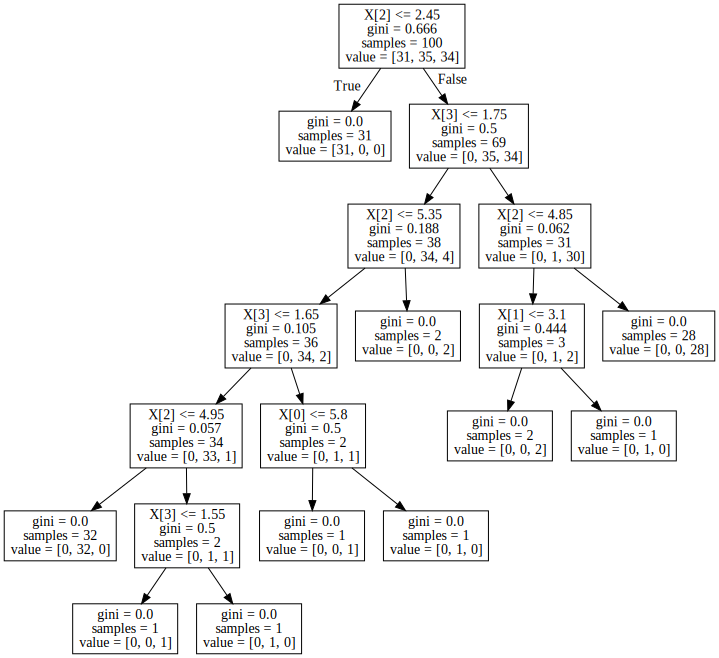

In [14]:
# 决策树图形
dot_data = export_graphviz(clf,)
graph = graphviz.Source(dot_data)
graph.render("digits",directory='./tree_pdf')
graph